第4回の演習です。ここでは、今後使うであろう数学を少し説明しておきます。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 4")

Chapter 4


# 数学
コンピュータビジョンではベクトルや行列を基にした演算を頻繁に行います。そこで、ベクトルや行列の演算、線形代数、微分といった数学について簡潔に説明します。ここでも中心的に使うライブラリはNumPyとmatplotlibです。NumPyとmatplotlibをインポートしておきます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## ベクトルの内積
ベクトルの内積はベクトルどうしの掛け算の一種です。以下のように、ベクトルの要素どうしをそれぞれかけて和を取ります。
$$\vec{a}=(a_1, a_2, \cdots, a_n)$$
$$\vec{b}=(b_1, b_2, \cdots, b_n)$$
$$\vec{a} \cdot \vec{b} = (a_1, a_2, \cdots, a_n) \cdot (b_1, b_2, \cdots, b_n)$$
$$ = (a_1 b_1 + a_2 b_2 + \cdots + a_n b_n)$$

注意点は、内積を取るベクトルどうしの要素数が等しくなくてはいけないことです。Numpyのdot関数を使って内積を求めます。同じことは、ベクトルの各要素の積をsum関数で和を取ることでも可能です。

In [ ]:
# ベクトルの内積
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print("dot関数：", np.dot(x, y))            # dot関数
print("sum関数：", np.sum(x * y))           # sum関数

dot関数： 32
sum関数： 32


## ノルム
ノルムはベクトルの大きさを表します。ノルムには幾つかの種類があります。ここでは、L1ノルムとL2ノルムについて説明します。L1ノルムは、ベクトルの要素の絶対値をそれぞれ足し合わせたものです。
$$\| \vec{x} \|_1 = |x_1| + |x_2| + \cdots + |x_n|$$
L2ノルムは、ベクトルの要素をそれぞれ二乗して和を取り、平方根を取ります。
$$\| \vec{x}\|_2 = \sqrt{x^2_1 + x^2_2 + \cdots + x^2_n} $$

ノルムを求めるにはNumPyのlinalgモジュールのnorm関数を使います。norm関数の引数には（入力データ, ノルムの次数）を指定します。入力データには一次元もしくは二次元の配列を入れます。

In [ ]:
# ノルム
x = np.array([1, 1, -1, -1, 1, 1, -1, -1])
print("L1ノルム：", np.linalg.norm(x, 1))           # L1ノルム
print("L2ノルム：", np.linalg.norm(x, 2))           # L2ノルム

L1ノルム： 8.0
L2ノルム： 2.8284271247461903


## 行列積
「行列積」は行列どうしを掛け合わせます。その掛け合わせ方は、左側の行列の行の要素を、右側の行列の列の要素とそれぞれ掛け合わせ、足します。これを、新しい行列の要素にします。例えば、以下のような行列*A*と行列*B*があった場合、*A*の各行と*B*の各列の要素をそれぞれ掛け合わせて和を取り、行列*C*の各要素に置きます。
$$A =
\begin{pmatrix}
a & b & c \\
d & e & f \\
\end{pmatrix}
$$
$$B =
\begin{pmatrix}
g & h \\
i & j \\
k & l \\
\end{pmatrix}
$$
$$C =
\begin{pmatrix}
a g + b i + c k & a h + b j + c l \\
d g + e i + f k & d h + e j + f l \\
\end{pmatrix}$$
注意点は、行列の左右を入れ替えることは基本的にはできません（満たすべき条件がある）。

In [ ]:
# 行列積
x = np.array([[1, 2, 3],
              [4, 5, 6]])
y = np.array([[2, 1],
              [2, 1],
              [2, 1]])
print(np.dot(x, y))

[[12  6]
 [30 15]]


## 転置
転置はすでにtranposeメソッドのところで出てきたので、復習になります。転置は、行列の行と列を入れ替える操作です。例えば、以下の行列*A*の転置を取ると、*A*<sup>T</sup>のようになります。
$$A =
\begin{pmatrix}
a & b & c \\
d & e & f \\
\end{pmatrix}
$$
$$A^\rm{T} =
\begin{pmatrix}
a & d \\
b & e \\
c & f \\
\end{pmatrix}
$$

In [ ]:
# 転置
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x.T)            # 転置

[[1 4]
 [2 5]
 [3 6]]


行列積では、左の行列の列数と、右の行列の行数が一致する必要があります。行と列の数が異なる行列の場合、転置によって行列積を可能にすることがあります。

In [ ]:
# 転置と行列積
x = np.array([[1, 2, 3],
              [4, 5, 6]])           # 2×3の行列
# print(np.dot(x, x))               # 転置しないとエラー
print(np.dot(x, x.T))

[[14 32]
 [32 77]]


## 単位行列
単位行列とは、行列の対角要素がすべて1で、その他の要素はすべて0であるものです。単位行列を生成するにははeye関数を使います。その引数に単位行列のサイズを指定します。

In [ ]:
# 単位行列
print("2×2の単位行列")
print(np.eye(2))
print("3×3の単位行列")
print(np.eye(3))

2×2の単位行列
[[1. 0.]
 [0. 1.]]
3×3の単位行列
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 逆行列
逆行列は、正方行列にその逆行列をかけると単位行列になります。行列*A*の逆行列を*A*<sup>-1</sup>のように表すと、以下のような関係が成り立ちます。
$$A^{-1} A = A A^{-1} = E$$
ここで、*E*は単位行列を表します。例えば、以下の例では行列*x*と*y*はお互いに逆行列の関係にあります。

In [ ]:
# 逆行列
x = np.array([[2, 1],
              [1, 1]])
y = np.array([[1, -1],
              [-1, 2]])
print(x)
print(y)
print(np.dot(x, y))           # 単位行列

[[2 1]
 [1 1]]
[[ 1 -1]
 [-1  2]]
[[1 0]
 [0 1]]


逆行列を求めるにはlinalgモジュールのinv関数を使います。

In [ ]:
# 逆行列
x = np.array([[2, 1],
              [1, 1]])
print(np.linalg.inv(x))           # 逆行列

[[ 1. -1.]
 [-1.  2.]]


## 行列式
行列式は、以下のような2×2の正方行列*A*の場合、det *A*のように表されます。
$$A =
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
$$
$$
\det A = a d - b c
$$
行列式は行列の特徴を表す指標の1で、スカラー量です。逆行列が存在するかどうかに使われます。行列式が0であるなら、逆行列は存在しません。行列式を求めるにはlinalgモジュールのdet関数を使います。

In [ ]:
# 逆行列
x = np.array([[2, 3],           # 2×2の正方行列
              [4, 5]])
print(np.linalg.det(x))         # 行列式が0にならない
y = np.array([[0, 2],           # 2×2の正方行列
              [0, 1]])
print(np.linalg.det(y))         # 行列式が0になる

-2.0
0.0


# 線形変換
線形変換は、ベクトルをベクトルに変換します。

## ベクトルの描画
ベクトルは大きさと方向を持った量と一般には定義されます。そこで、以下のような縦ベクトルを矢印で描画してみましょう。
$$\vec{a} =
\begin{pmatrix}
3 \\
2 \\
\end{pmatrix}
$$
矢印の描画にはmatplotlibライブラリのpyplotモジュールのquiver関数が使えます。quiver関数は、以下のような引数を取ります。
- 始点のx座標
- 始点のy座標
- 矢印のx成分
- 矢印のy成分
- 矢印の角度の指定方法
- スケールの単位
- スケール
- 矢印の色


matplotlibライブラリで描画するとき、figure関数を使ってfigureインスタンスを作成し、描画全体の領域を確保してから描画処理を行うようにします。このとき、add_subplotメソッドを使ってグラフの描画領域を追加します。これは、1つの描画領域を複数に分割し、それぞれの領域に対して別のグラフを描画できるようにするためです。ただ、ここではグラフは1つしか描きません。figureで描画するための台紙を作り、add_subplotでグラフ本体の枠を作るといった感じでしょうか。

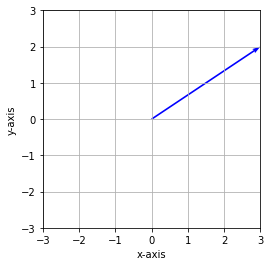

In [ ]:
# ベクトルの描画
s = np.array([0, 0])            # 始点（原点）
t = np.array([3, 2])            # 成分

fig = plt.figure()              # 描画領域を確保
ax = fig.add_subplot(111)       # 1行1列の1番目

ax.quiver(s[0], s[1], t[0], t[1],
           angles = "xy", scale_units = "xy", scale = 1, color = "blue")

ax.set_xlim([-3, 3])            # x軸の範囲
ax.set_ylim([-3, 3])            # y軸の範囲
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.grid()
ax.set_aspect("equal")          # グラフの軸の長さを等しくする

plt.show()

## 線形変換
以下のような行列*A*があったとします。
$$
A =
\begin{pmatrix}
2 & -2 \\
1 & -2 \\
\end{pmatrix}
$$
この行列*A*を縦ベクトルにかけると、この縦ベクトルを別の縦ベクトルへと変換できます。
$$
\vec{b} = A \vec{a} =
\begin{pmatrix}
2 & -2 \\
1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
3 \\
2 \\
\end{pmatrix}
=
\begin{pmatrix}
2 \\
-1 \\
\end{pmatrix}
$$
このような変換が線形変換です。

変換前： [3 2] 変換後 [ 2 -1]


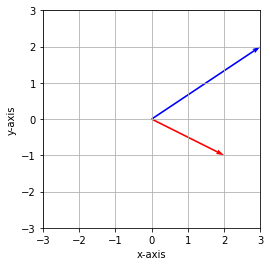

In [ ]:
# ベクトルの線形変換
x = np.array([3, 2])            # 変換前のベクトル
a = np.array([[2, -2],
              [1, -2]])         # 行列
y = np.dot(a, x)                # 線形変換（変数を記述する順番に注意）

print("変換前：", x, "変換後", y)

s = np.array([0, 0])            # 始点（原点）

fig = plt.figure()              # 描画領域を確保
ax = fig.add_subplot(111)       # 1行1列の1番目

ax.quiver(s[0], s[1], x[0], x[1],           # 変換前のベクトル
           angles = "xy", scale_units = "xy", scale = 1, color = "blue")
ax.quiver(s[0], s[1], y[0], y[1],           # 変換後のベクトル
           angles = "xy", scale_units = "xy", scale = 1, color = "red")

ax.set_xlim([-3, 3])            # x軸の範囲
ax.set_ylim([-3, 3])            # y軸の範囲
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.grid()
ax.set_aspect("equal")          # グラフの軸の長さを等しくする

plt.show()

## 固有値と固有ベクトル
正方行列*A*において、以下の式を満たすスカラー$\lambda$を行列*A*の固有値、ベクトルを$\vec{x}$を行列*A*の固有ベクトルといいます。
$$
A \vec{x} = \lambda \vec{x}
$$
この式は、固有ベクトルに線形変換を施すと、固有ベクトルの各要素が固有値倍になることを意味しています。上記の式の右辺を左辺に移項しますと、以下の式を得ます。
$$
(A - \lambda E) \vec{x} = \vec{0}
$$
行列$(A - \lambda E)$が逆行列を持たなければ、以下の行列式は0になります。
$$
\det (A - \lambda E) = 0
$$

固有値と固有ベクトルは、linalgモジュールのeig関数によって求めることができます。eig関数の出力は2つの配列になっており、1つ目の配列が固有値で、2つ目の配列が固有ベクトルです。eig関数は、固有ベクトルを単位ベクトル（大きさが1）の形で返します。

In [ ]:
# 固有値と固有ベクトル
x = np.array([[3, -1],
              [5, -3]])
ev = np.linalg.eig(x)           # 固有値と固有ベクトルを導出
print("固有値")
print(ev[0])                    # 1つ目の要素は固有値
print("固有ベクトル")
print(ev[1])                    # 2つ目の要素は固有ベクトル

固有値
[ 2. -2.]
固有ベクトル
[[0.70710678 0.19611614]
 [0.70710678 0.98058068]]


# 微分
微分は、関数の接線の傾き（勾配：変化の割合）を表します。以下の関数
$$
f(x) = 5 x^2 + 4 x - 3
$$
における点（$x = 1$）での接線を描画します。

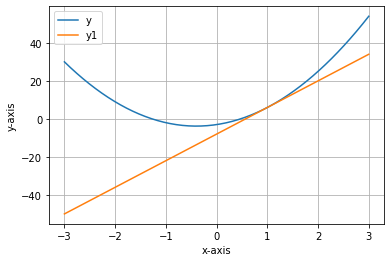

In [ ]:
# 接線の描画
def my_func(x):           # 二次式
    return 5 * x**2 + 4 * x - 3

def my_dif(x):            # 導関数
    return 10 * x + 4

x = np.linspace(-3, 3)
y = my_func(x)

x1 = 1
y1 = my_dif(x1)*x + my_func(x1) - my_dif(x1)*x1     # x=1のときの接線

plt.plot(x, y, label="y")
plt.plot(x, y1, label="y1")
plt.legend()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()
plt.show()